In [1]:
import torch
from torch import nn
from sklearn.datasets import make_moons
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [9]:
X, y = make_moons(n_samples=1000, random_state=42)
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [10]:
X[:5], y[:5]

(tensor([[ 0.0087,  0.3682],
         [ 0.9214, -0.4969],
         [ 0.9402, -0.4982],
         [ 0.4659, -0.3454],
         [-0.8504,  0.5261]]),
 tensor([1., 1., 1., 1., 0.]))

In [50]:
class NonlinearModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers_list = nn.Sequential(
            nn.Linear(in_features=2, out_features=15),
            nn.ReLU(),
            nn.Linear(in_features=15, out_features=15),
            nn.ReLU(),
            nn.Linear(in_features=15, out_features=10),
            nn.ReLU(),
            nn.Linear(in_features=10, out_features=1)
        )
        
    def forward(self, x):
        return self.layers_list(x)

model_0 = NonlinearModel()
model_0

NonlinearModel(
  (layers_list): Sequential(
    (0): Linear(in_features=2, out_features=15, bias=True)
    (1): ReLU()
    (2): Linear(in_features=15, out_features=15, bias=True)
    (3): ReLU()
    (4): Linear(in_features=15, out_features=10, bias=True)
    (5): ReLU()
    (6): Linear(in_features=10, out_features=1, bias=True)
  )
)

In [51]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [52]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [57]:
model_0.eval()
with torch.inference_mode():
    u_logits = model_0(X_test).squeeze()
    u_preds = torch.round(torch.sigmoid(u_logits))
    test_acc = accuracy_fn(y_test, u_preds)
print(f"First accuracy: {test_acc}")
i = 0
while test_acc <= 99:
    model_0.train()
    y_logits = model_0(X_train).squeeze()
    y_preds = torch.round(torch.sigmoid(y_logits))
    loss = loss_fn(y_logits, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    model_0.eval()
    with torch.inference_mode():
        test_logits = model_0(X_test).squeeze()
        test_preds = torch.round(torch.sigmoid(test_logits))
        test_acc = accuracy_fn(y_test, test_preds)
        
    if i%100 == 0:
        print(f"Accuracy: {test_acc}")
    i+=1
    
print(f"Final Accuracy: {test_acc} in {i}")
    

First accuracy: 98.5
Accuracy: 98.5
Final Accuracy: 99.5 in 12


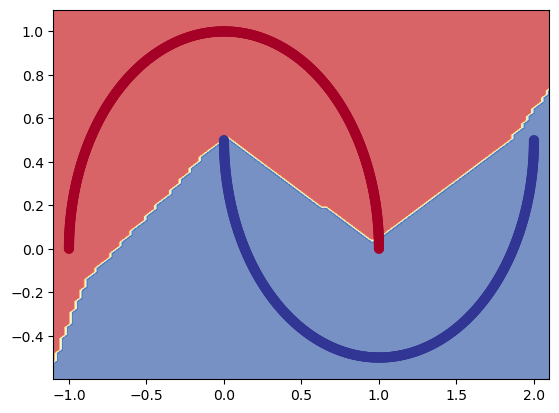

In [58]:
from helper_functions import plot_decision_boundary
plot_decision_boundary(model_0, X, y)

In [60]:
import numpy as np
def tanh(z):
	return (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))

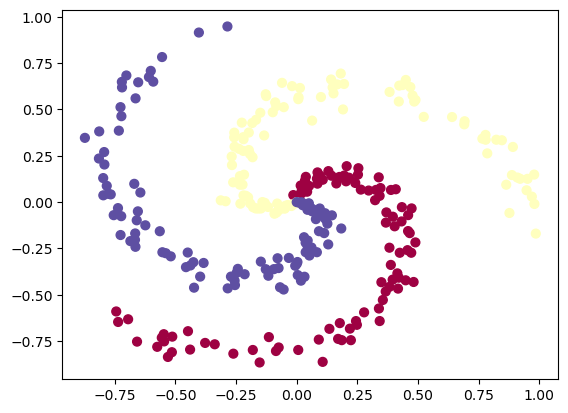

In [83]:
# Code for creating a spiral dataset from CS231n
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [84]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.LongTensor)

X[:5], y[:5]

(tensor([[-0.0000,  0.0000],
         [-0.0011,  0.0100],
         [-0.0022,  0.0201],
         [-0.0002,  0.0303],
         [-0.0140,  0.0379]]),
 tensor([0, 0, 0, 0, 0]))

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

len(X_train), len(X_test), len(y_train), len(y_test)

(240, 60, 240, 60)

In [90]:
class MultiClassModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers_list = nn.Sequential(
            nn.Linear(in_features=2, out_features=15),
            nn.ReLU(),
            nn.Linear(in_features=15, out_features=15),
            nn.ReLU(),
            nn.Linear(in_features=15, out_features=15),
            nn.Linear(in_features=15, out_features=15),
            nn.ReLU(),
            nn.Linear(in_features=15, out_features=4)
        )
        
    def forward(self, x):
        return self.layers_list(x)

In [93]:
model_1 = MultiClassModel()
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)
model_1.eval()
with torch.inference_mode():
    u_logits = model_1(X_test)
    u_preds = torch.softmax(u_logits, dim=1).argmax(dim=1)
    test_acc = accuracy_fn(y_test, u_preds)

print(f"First accuracy: {test_acc}")
i=0
while test_acc <= 95:
    model_1.train()
    y_logits = model_1(X_train)
    y_preds = torch.softmax(y_logits, dim=1).argmax(dim=1)
    loss = loss_fn(y_logits, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    model_1.eval()
    with torch.inference_mode():
        test_logits = model_1(X_test)
        test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)
        test_acc = accuracy_fn(y_test, test_preds)
        
    if i%10 == 0:
        print(f"Accuracy: {test_acc}")
    i+=1
        
print(f"Final accuracy: {test_acc} in {i} steps")

First accuracy: 36.666666666666664
Accuracy: 36.666666666666664
Accuracy: 21.666666666666668
Accuracy: 26.666666666666668
Accuracy: 26.666666666666668
Accuracy: 26.666666666666668
Accuracy: 26.666666666666668
Accuracy: 26.666666666666668
Accuracy: 26.666666666666668
Accuracy: 26.666666666666668
Accuracy: 26.666666666666668
Accuracy: 26.666666666666668
Accuracy: 26.666666666666668
Accuracy: 26.666666666666668
Accuracy: 26.666666666666668
Accuracy: 26.666666666666668
Accuracy: 26.666666666666668
Accuracy: 26.666666666666668
Accuracy: 31.666666666666664
Accuracy: 33.33333333333333
Accuracy: 38.333333333333336
Accuracy: 41.66666666666667
Accuracy: 41.66666666666667
Accuracy: 41.66666666666667
Accuracy: 43.333333333333336
Accuracy: 45.0
Accuracy: 43.333333333333336
Accuracy: 46.666666666666664
Accuracy: 50.0
Accuracy: 50.0
Accuracy: 45.0
Accuracy: 45.0
Accuracy: 48.333333333333336
Accuracy: 50.0
Accuracy: 50.0
Accuracy: 53.333333333333336
Accuracy: 53.333333333333336
Accuracy: 55.0000000000